# Data Preprocessing

### Import packages and functions

In [1]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 2.0 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [2]:
!pip install xplique

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 2.1 MB/s 


In [3]:
!pip install scipy==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
jax 0.3.17 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
aeppl 0.0.33 requires scipy>=1.4.0, but you have scipy 1.1.0 which is incompatible.


In [5]:
# Run encore si ça ce marche pas (tensorflow ne fonctionne pas du premier coup je ne sais pas pourquoi)
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import sklearn
import tensorflow as tf
import cv2
import h5py


from skimage import io
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,InputLayer
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc ,confusion_matrix, classification_report
from keras.utils.vis_utils import plot_model
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from skimage import io
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from PIL import Image, ImageOps

# MPL
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# CNN

# InceptionV3
from tensorflow.keras.applications import InceptionV3

# VGG16
from keras.applications.vgg16 import VGG16

## Attention network
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model

tf.compat.v1.disable_eager_execution()


In [6]:
# Hashing
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
import os

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
sns.set_palette("flare") #("husl")

### Visualize duplicated images

In order to see if there are any duplicates, we implement the hashing technique. 

Image hashing is the process of using an algorithm to assign a unique hash value to an image. Duplicate copies of the image all have the exact same hash value. 

In [9]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [10]:
directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/'
dataset_folders = ['test','train', 'val']
dir_labels = ['PNEUMONIA', 'NORMAL']

import hashlib, os
duplicates = []
files_list = []
hash_keys = dict()

for folder in dataset_folders:
    # Append path of each file in the directory to files list
      dir = os.path.join(directory,folder)
      for label in dir_labels:
        dir_label = os.path.join(dir, label)
        os.chdir(dir_label)
        files_list.extend(os.listdir('.'))
        for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
          if os.path.isfile(filename):
               with open(filename, 'rb') as f:
                   filehash = hashlib.md5(f.read()).hexdigest()
               if filehash not in hash_keys: 
                  hash_keys[filehash] = index
               else:
                    duplicates.append((index,hash_keys[filehash]))

In [11]:
print(len(files_list))

5856


In [12]:
duplicates

[(123, 38),
 (127, 112),
 (325, 208),
 (136, 116),
 (152, 141),
 (190, 111),
 (515, 332),
 (696, 550),
 (1248, 1233),
 (1625, 1603),
 (2157, 2128),
 (2190, 2071),
 (2219, 2120),
 (2234, 2227),
 (2613, 2557),
 (2639, 2626),
 (2641, 2436),
 (2836, 2770),
 (2847, 2770),
 (2872, 2656),
 (2876, 2817),
 (2955, 2921),
 (3322, 3055),
 (3378, 3337),
 (3501, 3321),
 (3636, 3590),
 (3712, 3524),
 (3716, 3598),
 (3785, 3763),
 (3823, 3763),
 (3869, 3777),
 (411, 410)]

In [13]:
print("Total number of duplicates:",len(duplicates))

Total number of duplicates: 32


To check if the algorithm worked correctly, we visualize exemples of duplicates:




3875
[(515, 332), (696, 550), (1248, 1233), (1625, 1603), (2157, 2128), (2190, 2071), (2219, 2120), (2234, 2227), (2613, 2557), (2639, 2626), (2641, 2436), (2836, 2770), (2847, 2770), (2872, 2656), (2876, 2817), (2955, 2921), (3322, 3055), (3378, 3337), (3501, 3321), (3636, 3590), (3712, 3524), (3716, 3598), (3785, 3763), (3823, 3763), (3869, 3777)]


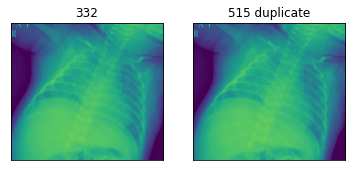

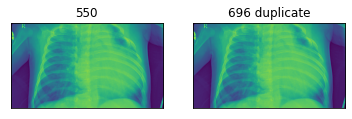

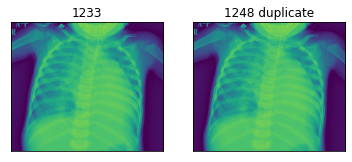

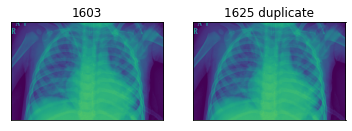

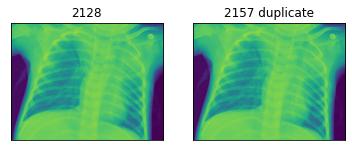

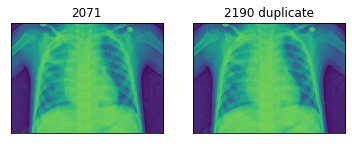

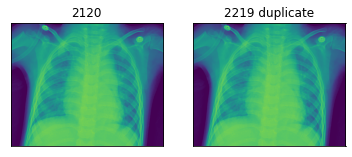

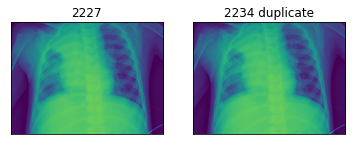

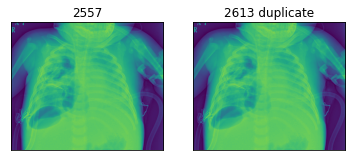

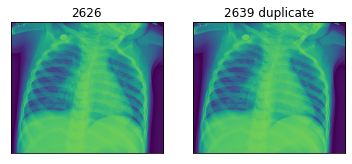

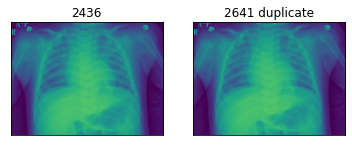

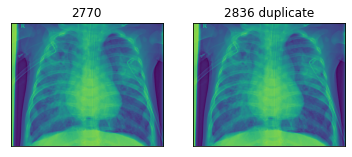

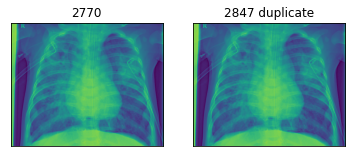

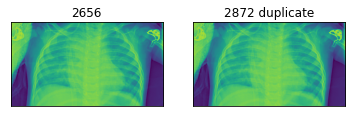

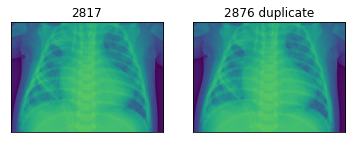

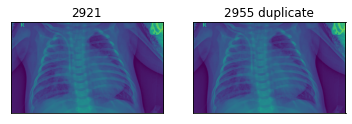

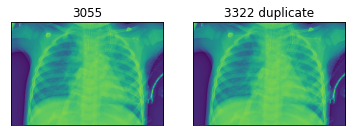

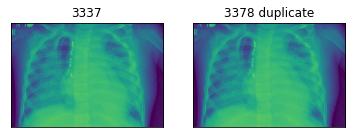

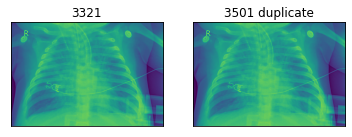

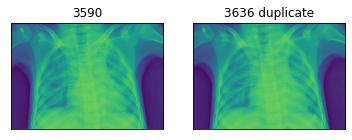

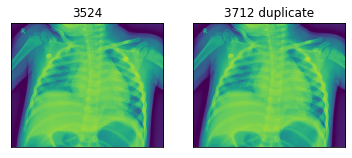

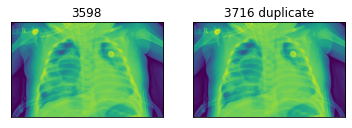

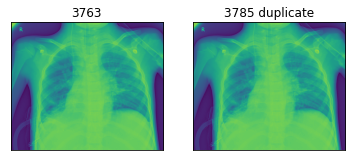

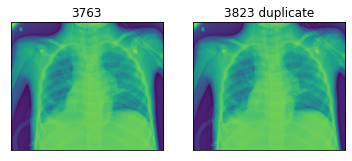

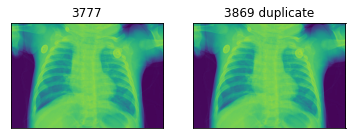

In [14]:
def file_hash(filename):
    with open(filename,'rb') as f:
        return md5(f.read()).hexdigest()
os.getcwd()
filename = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/train/PNEUMONIA'
os.chdir(filename)
os.getcwd()
files_list = os.listdir('.')
print (len(files_list))
duplicates=[]
hash_keys=dict()
for index, filename in enumerate(os.listdir('.')):
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash]=index
        else:
            duplicates.append((index,hash_keys[filehash]))
print(duplicates)
for file_indexes in duplicates[:30]:
    try:
        plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
        plt.title(file_indexes[1]),plt.xticks([]),plt.yticks([])
        plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0])+ ' duplicate'),plt.xticks([]),plt.yticks([])
        plt.show()
    except OSError as e:
        continue

### Create clean dataframe

In [9]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [10]:
# Sort paths for normal vs. pneumonia images
directory = '/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/'
dataset_folders = ['test','train', 'val']
dir_labels = ['PNEUMONIA', 'NORMAL']

path = []

img_size = 224 # input size for VGG16, also good for InceptionV3

def get_training_data(data_dir) :
  data = []
  duplicates = []
  hash_keys = dict()

  for folder in dataset_folders:
    # Path for each file
      dir = os.path.join(directory,folder)
      for label in dir_labels:
        dir_label = os.path.join(dir, label)
        for img in os.listdir(dir_label):
            try:
                img_arr = cv2.imread(os.path.join(dir_label, img), cv2.IMREAD_GRAYSCALE) # Gray images
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Resize to 224, 224
                
                # For MLP
                #image_eq = cv2.equalizeHist(resized_arr)

                # For CNN
                backtorgb = cv2.cvtColor(resized_arr,cv2.COLOR_GRAY2RGB) # Convert to RGB
                r_image, g_image, b_image = cv2.split(backtorgb) # Split into 3 channels --> RGB
                r_image_eq = cv2.equalizeHist(r_image) # Equalize histogram to enhance contrast
                g_image_eq = cv2.equalizeHist(g_image)
                b_image_eq = cv2.equalizeHist(b_image)
                image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq)) # Merge 3 channels RGB

                # Hashing for each image to detect any duplicate
                with open(os.path.join(dir_label, img), 'rb') as f:
                      filehash = hashlib.md5(f.read()).hexdigest()

                if label == 'NORMAL':
                    data.append([image_eq, filehash, 'Normal'])

                if label == 'PNEUMONIA':
                  data.append([image_eq, filehash, 'Pneumonia'])

            except Exception as e:
                print(e)
  return np.array(data)    


In [11]:
all_data = get_training_data('../content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray')

In [12]:
all_data

array([[array([[[ 18,  18,  18],
                [ 18,  18,  18],
                [ 18,  18,  18],
                ...,
                [133, 133, 133],
                [ 20,  20,  20],
                [132, 132, 132]],

               [[ 18,  18,  18],
                [ 17,  17,  17],
                [ 19,  19,  19],
                ...,
                [108, 108, 108],
                [142, 142, 142],
                [145, 145, 145]],

               [[ 17,  17,  17],
                [ 17,  17,  17],
                [ 18,  18,  18],
                ...,
                [100, 100, 100],
                [131, 131, 131],
                [148, 148, 148]],

               ...,

               [[  0,   0,   0],
                [  0,   0,   0],
                [  0,   0,   0],
                ...,
                [  0,   0,   0],
                [  0,   0,   0],
                [  0,   0,   0]],

               [[  0,   0,   0],
                [  0,   0,   0],
                [  0,   0,   

In [13]:
raw_df = pd.DataFrame(all_data, columns = ['Image', 'Hash', 'Class'])

In [14]:
print(raw_df)

                                                  Image  \
0     [[[18, 18, 18], [18, 18, 18], [18, 18, 18], [1...   
1     [[[252, 252, 252], [249, 249, 249], [222, 222,...   
2     [[[41, 41, 41], [42, 42, 42], [44, 44, 44], [4...   
3     [[[0, 0, 0], [0, 0, 0], [5, 5, 5], [8, 8, 8], ...   
4     [[[204, 204, 204], [202, 202, 202], [60, 60, 6...   
...                                                 ...   
5851  [[[95, 95, 95], [2, 2, 2], [155, 155, 155], [2...   
5852  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
5853  [[[179, 179, 179], [0, 0, 0], [148, 148, 148],...   
5854  [[[15, 15, 15], [0, 0, 0], [6, 6, 6], [8, 8, 8...   
5855  [[[67, 67, 67], [0, 0, 0], [75, 75, 75], [11, ...   

                                  Hash      Class  
0     d529cabe7f79660a1c2028854491e4e2  Pneumonia  
1     6da1d692a1a39ee18b644fc6633fc4de  Pneumonia  
2     608d7ed2c16700a49d4253841cf63fbd  Pneumonia  
3     520390708b8feb0f495ca8cd3ca09fd8  Pneumonia  
4     243a49550bff1c19477f70cac

In [15]:
raw_df.dtypes

Image    object
Hash     object
Class    object
dtype: object

I look at the duplicate images by comparing the images of all the folders together, thanks to the "hashing" technique.

Image hashing is the process of using an algorithm to assign a unique hash value to an image. The duplicate copies of the image all have the exact same "hash" value. For this reason, it is sometimes referred to as a "digital fingerprint".

In [16]:
raw_df.duplicated(subset=['Hash'])

0       False
1       False
2       False
3       False
4       False
        ...  
5851    False
5852    False
5853    False
5854    False
5855    False
Length: 5856, dtype: bool

In [17]:
print('Number of duplicated images:', raw_df.duplicated(subset=['Hash']).sum())

Number of duplicated images: 32


In [18]:
df = raw_df.drop_duplicates(subset=['Hash'])

In [19]:
len(raw_df)

5856

In [20]:
len(df)

5824

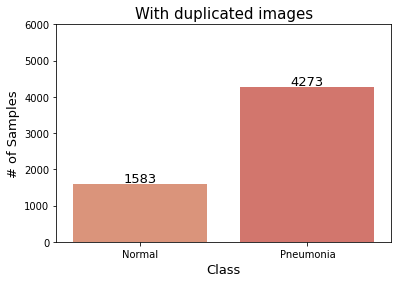

In [21]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=raw_df, order = ['Normal', 'Pneumonia'])
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("With duplicated images", fontsize=15)
plt.ylim(0,6000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

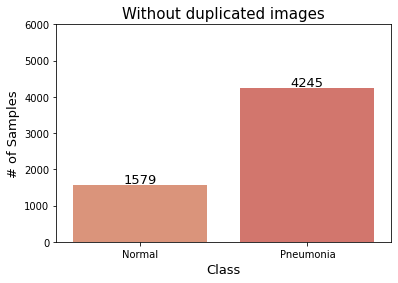

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=df, order = ['Normal', 'Pneumonia'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Without duplicated images", fontsize=15)

plt.ylim(0,6000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

In [23]:
# I don't need 'Hash' anymore
df = df.drop('Hash', axis=1)

In [24]:
df

Image      Class
0     [[[18, 18, 18], [18, 18, 18], [18, 18, 18], [1...  Pneumonia
1     [[[252, 252, 252], [249, 249, 249], [222, 222,...  Pneumonia
2     [[[41, 41, 41], [42, 42, 42], [44, 44, 44], [4...  Pneumonia
3     [[[0, 0, 0], [0, 0, 0], [5, 5, 5], [8, 8, 8], ...  Pneumonia
4     [[[204, 204, 204], [202, 202, 202], [60, 60, 6...  Pneumonia
...                                                 ...        ...
5851  [[[95, 95, 95], [2, 2, 2], [155, 155, 155], [2...     Normal
5852  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     Normal
5853  [[[179, 179, 179], [0, 0, 0], [148, 148, 148],...     Normal
5854  [[[15, 15, 15], [0, 0, 0], [6, 6, 6], [8, 8, 8...     Normal
5855  [[[67, 67, 67], [0, 0, 0], [75, 75, 75], [11, ...     Normal

[5824 rows x 2 columns]

The number of samples is not balanced between our 3 classes. Since we have a large number of observations with the smallest class with 1579 observations, I decide to downsample the other majority classes.

In [25]:
# Downsample
class_2,class_1 = df['Class'] .value_counts()
cn = df[df['Class'] == 'Normal']
cb = df[df['Class'] == 'Pneumonia']
df_2 = cb.sample(class_1)

In [26]:
undersampled_df = pd.concat([df_2,cn],axis=0)

In [27]:
undersampled_df['Class'].value_counts()

Pneumonia    1579
Normal       1579
Name: Class, dtype: int64

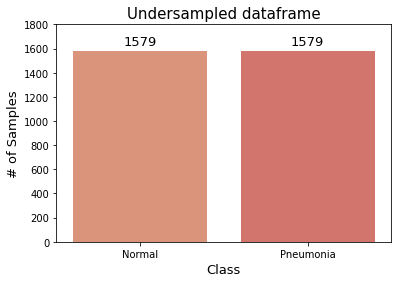

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Class', data=undersampled_df, order = ['Normal', 'Pneumonia'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Undersampled dataframe", fontsize=15)
plt.ylim(0,1800)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

In [29]:
numpy_df = undersampled_df.to_numpy()

In [30]:
# I define X y 
x = []
y = []
for feature, label in numpy_df:
    x.append(feature)
    y.append(label)


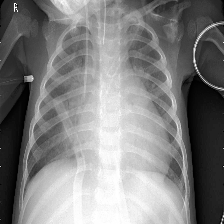

In [31]:
# I visualize the image to verifie the quality
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
for i in range(1):
    fig = px.imshow(x[i], color_continuous_scale='gray', title=y[i])
    fig.show()

# Image classification

## Preprocessing

### Parameters

In [32]:
nb_classes = 2 # For Normal and Pneumonie
img_size = 224
nb_channels = 3 # For RGB

### Split dataset

In [42]:
# I split my data into 3 sets : train, validation and test 
  # Stratify allows us to balance our classes between sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.1, random_state=42, stratify = y_train)



In [43]:
# Normalization

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(f'X_train shape: {x_train.shape}')
print(f'X_val shape: {x_val.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'----------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'----------------------------------')
print(f'Number of training examples:  {len(x_train)}')
print(f'Number of validation examples: {len(x_val)}')
print(f'Number of testing examples:  {len(x_test)}')

X_train shape: (2273, 224, 224, 3)
X_val shape: (253, 224, 224, 3)
X_test shape: (632, 224, 224, 3)
----------------------------------
y_train shape: (2273,)
y_val shape: (253,)
y_test shape: (632,)
----------------------------------
Number of training examples:  2273
Number of validation examples: 253
Number of testing examples:  632


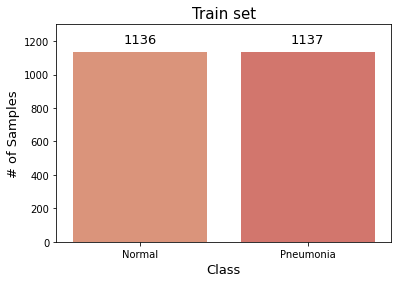

In [44]:
# Visualize Train set
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_train,  order = ['Normal', 'Pneumonia'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Train set", fontsize= 15)
plt.ylim(0,1300)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+50), fontsize = 13)
    
plt.show()

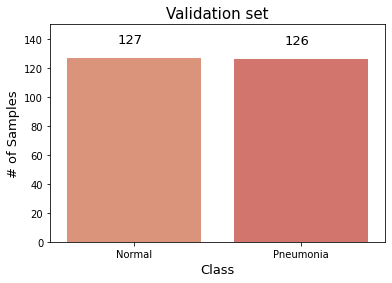

In [45]:
# Visualize Validation set
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_val,  order = ['Normal', 'Pneumonia']  )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Validation set", fontsize= 15)
plt.ylim(0,150)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+10), fontsize = 13)
    
plt.show()

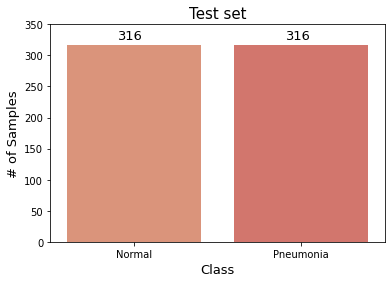

In [46]:
#  Visualize Test set
plt.figure(figsize=(6,4))
ax = sns.countplot(x=y_test, order = ['Normal', 'Pneumonia'] )
plt.xlabel("Class", fontsize= 13)
plt.ylabel("# of Samples", fontsize= 13)
plt.title("Test set", fontsize= 15)
plt.ylim(0,350)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+10), fontsize = 13)
    
plt.show()

### OneHotEncoder

One-hot encoding is a process by which categorical data (such as nominal data) are converted into numerical features of a dataset. This optimizes machine learning models.

In [38]:
from sklearn.preprocessing import OneHotEncoder

#Reshaping the dataset by adding a new axis
y_train = y_train[:,np.newaxis]
y_val = y_val[:,np.newaxis]
y_test = y_test[:,np.newaxis]

#Initialize onehot encoder
encode = OneHotEncoder(sparse=False)


#Encoding the images
y_train_encode = encode.fit_transform(y_train)
y_val_encode = encode.fit_transform(y_val)
y_test_encode = encode.transform(y_test)

#printing the shapes of the vectors 
print('Y_train: ' + str(y_train_encode.shape))
print('Y_val: ' + str(y_val_encode.shape))
print('Y_test:  '  + str(y_test_encode.shape))
print(encode.categories_)
print(encode.get_feature_names())



Y_train: (2273, 2)
Y_val: (253, 2)
Y_test:  (632, 2)
[array(['Normal', 'Pneumonia'], dtype='<U9')]
['x0_Normal' 'x0_Pneumonia']


### Callbacks

**EarlyStopping** is used to stop training once model performance stops improving on a set of validation data.
**ReduceLROnPlateau** allows to reduce the learning rate when a metric has stopped improving.
**ModelCheckpoint** allows to define where to check model weights, how to name the file and under what circumstances to create a model checkpoint.

The **val_categorical_accuracy** calculates the percentage accuracy of predicted values (yPred) that correspond to actual values (yTrue) for one-hot labels. It takes into account the validation set (and not the training set) to avoid overfitting

In [39]:
#CallBacks Function
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
early_stop = EarlyStopping(monitor="val_loss",
                         patience=5,
                         mode="auto",)


epoch = 40 
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)



model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', verbose=1, save_best_only=True)

callbacks=[early_stop, lr_sched, model_checkpoint]


### Clean variables

In [40]:
del all_data
del raw_df
del df 
del undersampled_df
del y_train, y_val, y_test

# Multi Layers Perceptron (MLP)

### Input_dim = float32

MLP models require a vector format of inputs (1 single dimension). X must be converted to float32 format

In [ ]:
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)

x_train shape: (2273, 224, 224)
x_val shape: (253, 224, 224)
x_test shape: (632, 224, 224)


In [ ]:
x_train_fl = x_train.reshape(-1, img_size*img_size).astype('float32')
x_val_fl = x_val.reshape(-1, img_size*img_size).astype('float32')
x_test_fl = x_test.reshape(-1, img_size*img_size).astype('float32') 


In [ ]:
print('x_train float32 shape:', x_train_fl.shape)
print('x_val float32 shape:', x_val_fl.shape)
print('x_test float32 shape:', x_test_fl.shape)

print('y_train_encode shape:', y_train_encode.shape)
print('y_val_encode shape:', y_val_encode.shape)
print('y_test_encode shape:', y_test_encode.shape)

x_train float32 shape: (2273, 50176)
x_val float32 shape: (253, 50176)
x_test float32 shape: (632, 50176)
y_train_encode shape: (2273, 2)
y_val_encode shape: (253, 2)
y_test_encode shape: (632, 2)


## Sequential MLP

In [ ]:
input_dim = x_train_fl.shape[1]

In [ ]:
# Here's a Deep Dumb MLP (DDMLP)
mlp = Sequential()
mlp.add(Dense(128, input_dim=input_dim,activation='relu')) 
mlp.add(Dropout(0.15)) # Dropout for better generalization and avoid overfitting
mlp.add(Dense(128,activation='relu'))
mlp.add(Dropout(0.15))
mlp.add(Dense(nb_classes,activation='sigmoid')) # sigmoid for binary classification


In [ ]:
# Compute model parameters
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

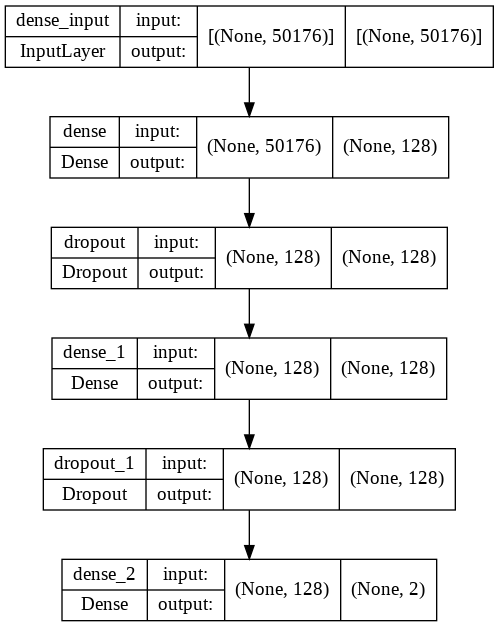

In [ ]:
# visualize model
plot_model(mlp, to_file = 'mlp_model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# train the network
mlp_history = mlp.fit(x_train_fl, y_train_encode, validation_data = (x_train_fl, y_train_encode), epochs = 100, callbacks = callbacks)  #epochs=20, batch_size=10

Train on 2273 samples, validate on 2273 samples
Epoch 1/100
2144/2273 [===========================>..] - ETA: 0s - loss: 0.5149 - accuracy: 0.7486
Epoch 1: val_loss improved from inf to 0.31104, saving model to best_model.h5
2273/2273 [==============================] - 2s 752us/sample - loss: 0.5063 - accuracy: 0.7536 - val_loss: 0.3110 - val_accuracy: 0.8795 - lr: 1.0000e-04
Epoch 2/100
2208/2273 [============================>.] - ETA: 0s - loss: 0.3252 - accuracy: 0.8650
Epoch 2: val_loss improved from 0.31104 to 0.26434, saving model to best_model.h5
2273/2273 [==============================] - 1s 446us/sample - loss: 0.3242 - accuracy: 0.8649 - val_loss: 0.2643 - val_accuracy: 0.8896 - lr: 1.0000e-04
Epoch 3/100
2144/2273 [===========================>..] - ETA: 0s - loss: 0.2723 - accuracy: 0.8885
Epoch 3: val_loss improved from 0.26434 to 0.25211, saving model to best_model.h5
2273/2273 [==============================] - 1s 547us/sample - loss: 0.2704 - accuracy: 0.8907 - val_loss

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
mlp.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/mlp.h5') 

### Model performance 

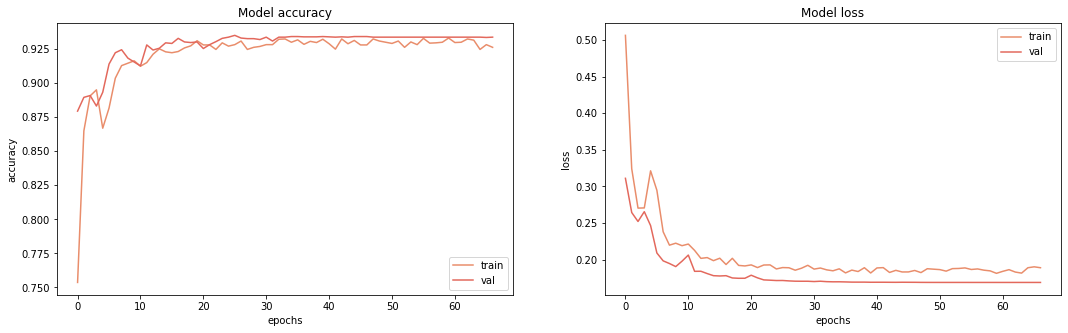

In [ ]:
# Learning curve based on categorical_accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(mlp_history.history[element])
    axis[i].plot(mlp_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
                Normal    Pneumonia  accuracy    macro avg  weighted avg
precision     0.925734     0.942601  0.934008     0.934167      0.934171
recall        0.943662     0.924362  0.934008     0.934012      0.934008
f1-score      0.934612     0.933393  0.934008     0.934002      0.934002
support    1136.000000  1137.000000  0.934008  2273.000000   2273.000000
_______________________________________________
Confusion Matrix: 
 [[1072   64]
 [  86 1051]]

Test Result:
Accuracy Score: 92.09%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.903030    0.940397  0.920886    0.921714      0.921714
recall       0.943038    0.898734  0.920886    0.920886      0.920886
f1-score     0.922601    0.919094  0.920886    0.920847      0.920847
support    316.000000  316.000000  0.920886 

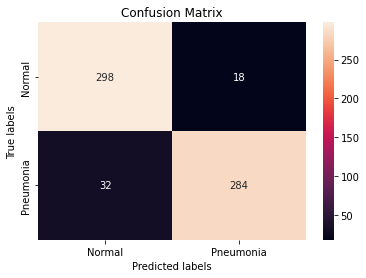

In [ ]:
# Print scores for Training and Testing sets

def print_score(mlp, x_train_fl, y_train_encode, x_test_fl, y_test_encode, train=True):
    if train:
        pred = mlp.predict(x_train_fl)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = mlp.predict(x_test_fl)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])

print_score(mlp, x_train_fl, y_train_encode, x_test_fl, y_test_encode, train=True)
print_score(mlp, x_train_fl,y_train_encode, x_test_fl, y_test_encode, train=False)

In [ ]:
# Print scores for Validation set

pred = mlp.predict(x_val_fl)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 91.70%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.889706    0.948718  0.916996    0.919212      0.919095
recall       0.952756    0.880952  0.916996    0.916854      0.916996
f1-score     0.920152    0.913580  0.916996    0.916866      0.916879
support    127.000000  126.000000  0.916996  253.000000    253.000000
_______________________________________________
Confusion Matrix: 
 [[121   6]
 [ 15 111]]



### ROC Curve

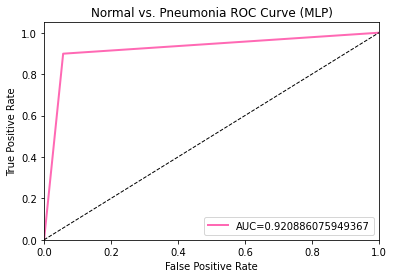

In [ ]:
from sklearn import metrics
y_pred = mlp.predict(x_test_fl)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Normal vs. Pneumonia ROC Curve (MLP)')
plt.legend(loc="lower right")
plt.show()

### Visualization of classification

In [ ]:
predict_prob=mlp.predict(x_test_fl)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)

In [ ]:
correct = np.nonzero(predict_classes == y_test_argmax)[0]
incorrect = np.nonzero(predict_classes != y_test_argmax)[0]

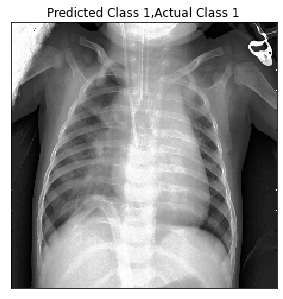

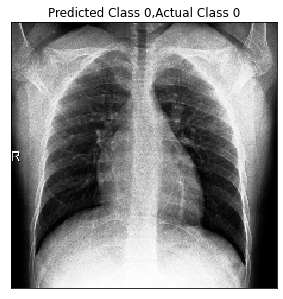

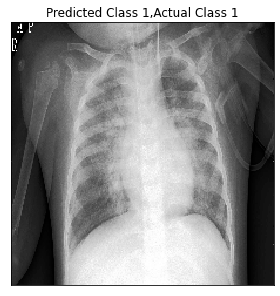

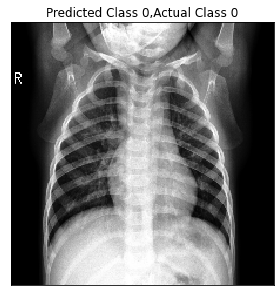

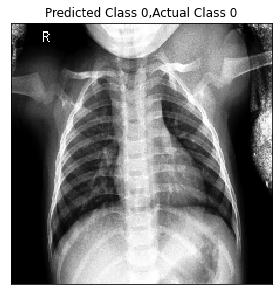

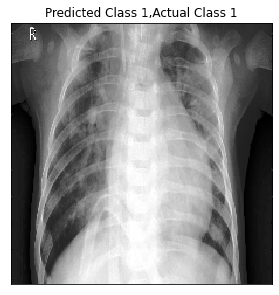

In [ ]:
# Correct classification

i = 0
for c in correct[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fl[c].reshape(img_size,img_size), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Normal
# class 1 = Pneumonia

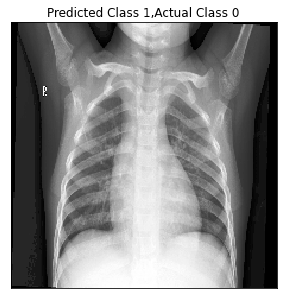

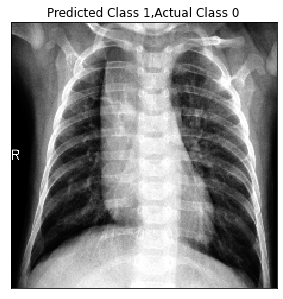

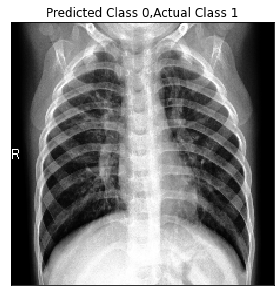

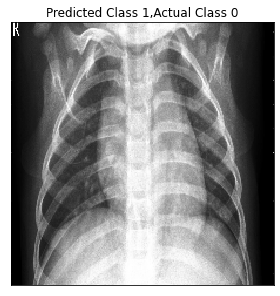

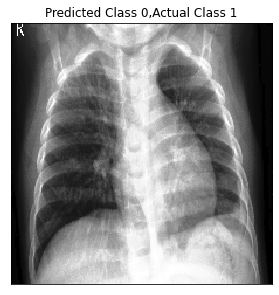

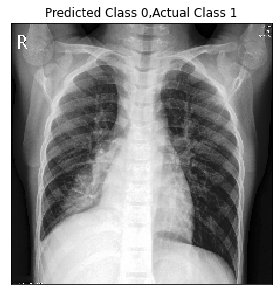

In [ ]:
# Incorrect classification

i = 0
for c in incorrect[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fl[c].reshape(img_size,img_size), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Normal
# class 1 = Pneumonia

# Convolutional Neural Network (CNN)

### Input_shape

CNN networks require 2-dimensional, 3-channel input_shape.


In [ ]:
#printing the shapes of the vectors 
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train_encode.shape))
print()
print('X_val: ' + str(x_val.shape))
print('Y_val: ' + str(y_val_encode.shape))
print()
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test_encode.shape))

X_train: (2273, 224, 224, 3)
Y_train: (2273, 2)

X_val: (253, 224, 224, 3)
Y_val: (253, 2)

X_test:  (632, 224, 224, 3)
Y_test:  (632, 2)



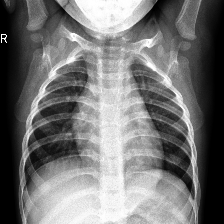

In [ ]:
# Check the quality of the image

for i in range(1):
    fig = px.imshow(x_train[i], color_continuous_scale='gray')
    fig.show()

## Sequential CNN

In [ ]:
# Implement CNN model from scratch

cnn = Sequential()

cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (img_size, img_size, nb_channels), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size = (2, 2)))

cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.2)) # for better generalization and to avoid overfitting

cnn.add(Dense(nb_classes, activation = 'sigmoid')) # sigmoid for binary classification

# Define parameters
cnn.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


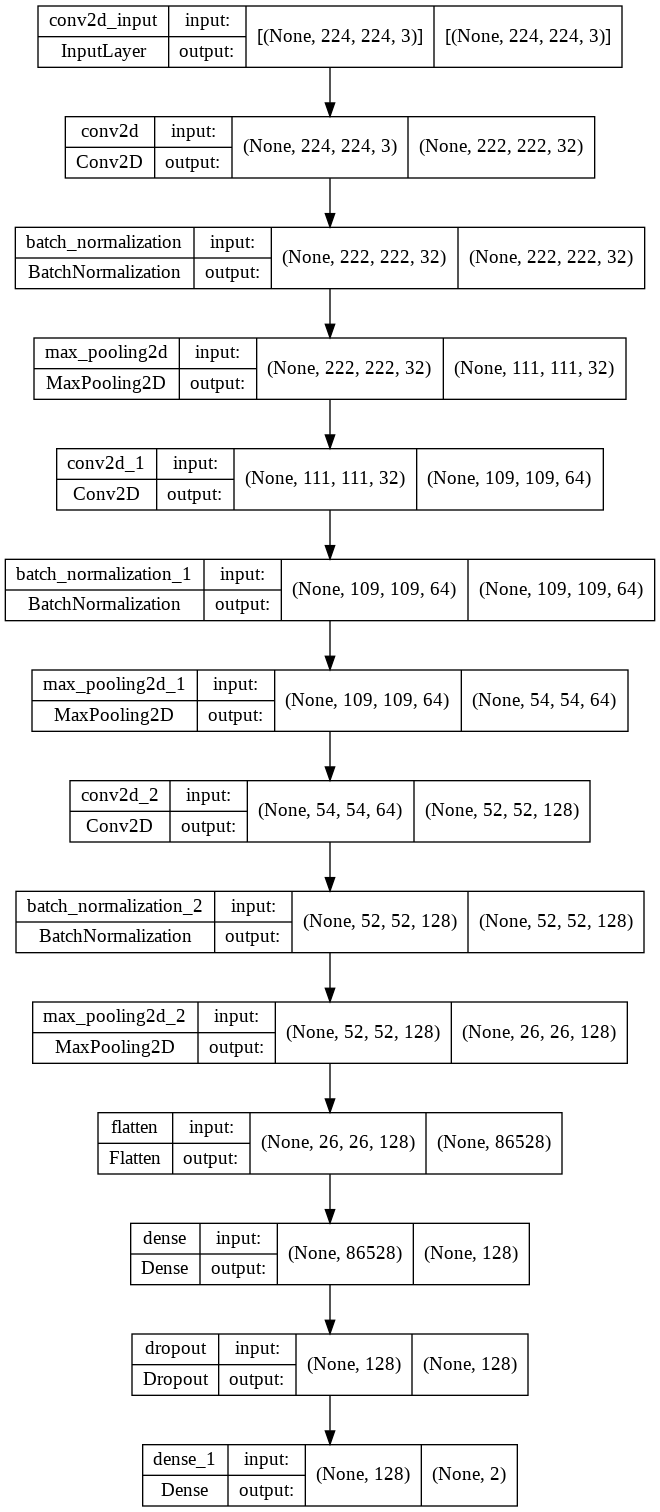

In [ ]:
# Visualize model
plot_model(cnn, to_file = 'cnn_model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Fit the model
cnn_history = cnn.fit(x_train, y_train_encode, validation_data = (x_val, y_val_encode), epochs = 100, callbacks = callbacks)

Train on 2273 samples, validate on 253 samples
Epoch 1/100
2273/2273 [==============================] - ETA: 0s - loss: 0.4429 - accuracy: 0.8922
Epoch 1: val_loss improved from inf to 2.14038, saving model to best_model.h5
2273/2273 [==============================] - 304s 134ms/sample - loss: 0.4429 - accuracy: 0.8922 - val_loss: 2.1404 - val_accuracy: 0.4980 - lr: 1.0000e-04
Epoch 2/100
2273/2273 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 0.9538
Epoch 2: val_loss did not improve from 2.14038
2273/2273 [==============================] - 280s 123ms/sample - loss: 0.1252 - accuracy: 0.9538 - val_loss: 2.9404 - val_accuracy: 0.4980 - lr: 1.0000e-04
Epoch 3/100
2273/2273 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9791
Epoch 3: val_loss improved from 2.14038 to 2.03937, saving model to best_model.h5
2273/2273 [==============================] - 283s 125ms/sample - loss: 0.0599 - accuracy: 0.9791 - val_loss: 2.0394 - val_accuracy: 0.498

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
cnn.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/cnn.h5') 

### Model performance 

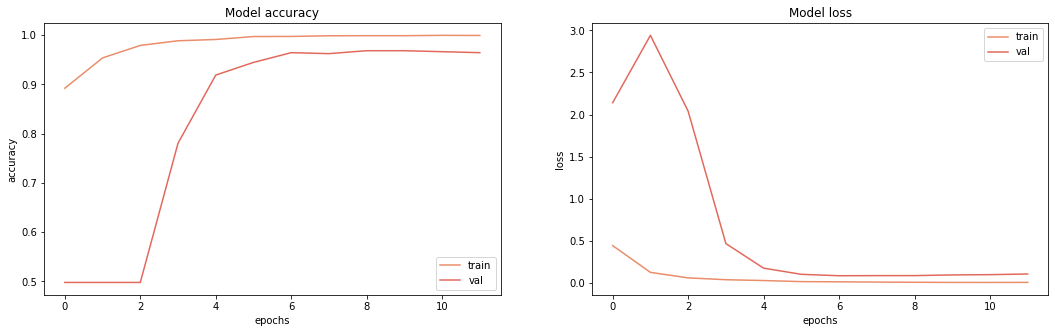

In [ ]:
# Learning Curve with accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(cnn_history.history[element])
    axis[i].plot(cnn_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Normal  Pneumonia  accuracy  macro avg  weighted avg
precision     1.0        1.0       1.0        1.0           1.0
recall        1.0        1.0       1.0        1.0           1.0
f1-score      1.0        1.0       1.0        1.0           1.0
support    1136.0     1137.0       1.0     2273.0        2273.0
_______________________________________________
Confusion Matrix: 
 [[1136    0]
 [   0 1137]]

Test Result:
Accuracy Score: 94.62%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.937888    0.954839  0.946203    0.946363      0.946363
recall       0.955696    0.936709  0.946203    0.946203      0.946203
f1-score     0.946708    0.945687  0.946203    0.946198      0.946198
support    316.000000  316.000000  0.946203  632.000000    632.000000
__________________

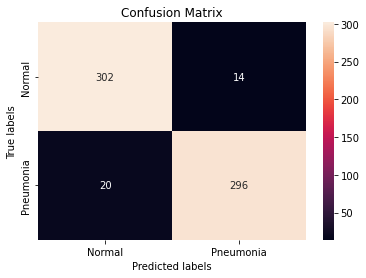

In [ ]:
# Print the score of Training and Testings sets

def print_score(cnn, x_train, y_train_encode, x_test, y_test_encode, train=True):
    if train:
        pred = cnn.predict(x_train)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Normal','Pneumonia']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = cnn.predict(x_test)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Normal','Pneumonia']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Normal','Pneumonia']); ax.yaxis.set_ticklabels(['Normal','Pneumonia'])


print_score(cnn, x_train, y_train_encode, x_test, y_test_encode, train=True)
print_score(cnn, x_train,y_train_encode, x_test, y_test_encode, train=False)

In [ ]:
# Print the score of Validation set

pred = cnn.predict(x_val)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 96.05%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.953488    0.967742  0.960474    0.960615      0.960587
recall       0.968504    0.952381  0.960474    0.960442      0.960474
f1-score     0.960938    0.960000  0.960474    0.960469      0.960471
support    127.000000  126.000000  0.960474  253.000000    253.000000
_______________________________________________
Confusion Matrix: 
 [[123   4]
 [  6 120]]



### ROC Curve


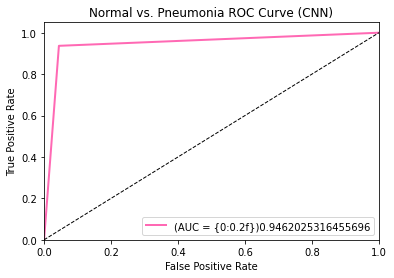

In [ ]:
from sklearn import metrics
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label='(AUC = {0:0.2f})'+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Normal vs. Pneumonia ROC Curve (CNN)')
plt.legend(loc="lower right")
plt.show()

### Classification visualization

In [ ]:
predict_prob=cnn.predict(x_test)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)
correct = np.nonzero(predict_classes == y_test_argmax)[0]
incorrect = np.nonzero(predict_classes != y_test_argmax)[0]


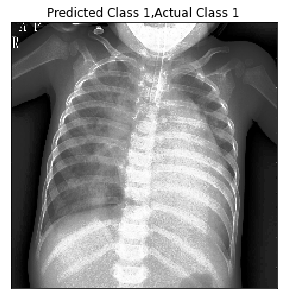

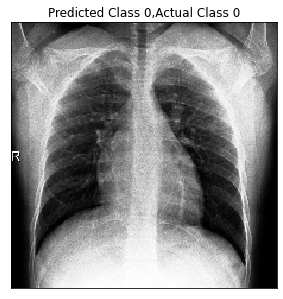

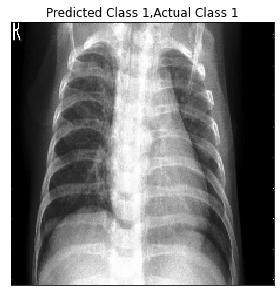

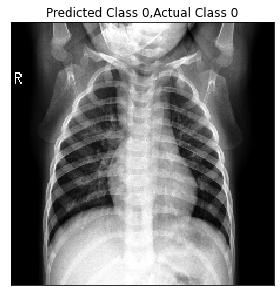

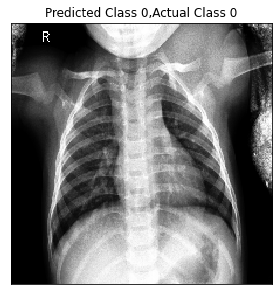

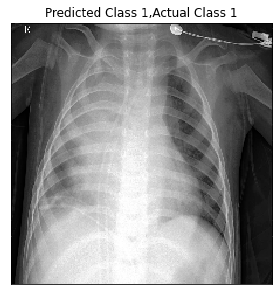

In [ ]:
# Correct classification

i = 0
for c in correct[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Normal
# class 1 = Pneumonia

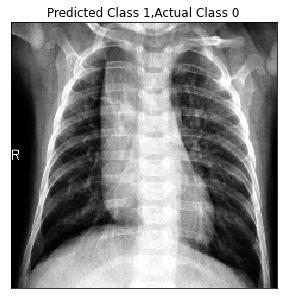

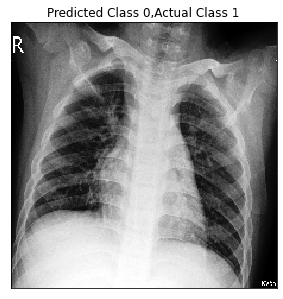

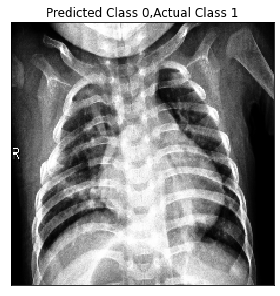

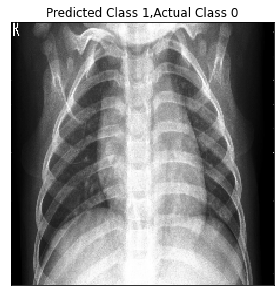

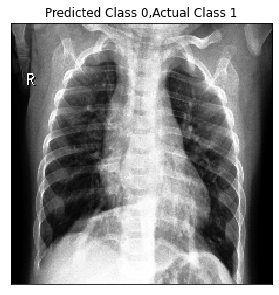

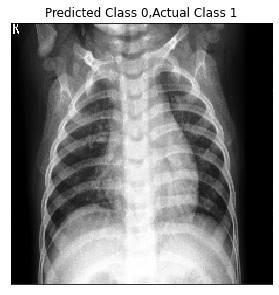

In [ ]:
# Incorrect classification

i = 0
for c in incorrect[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Normal
# class 1 = Pneumonia

## InceptionV3

In [ ]:
# Implement and fine-tune the InceptionV3 model

in_lay = Input(x_train.shape[1:]) 
base_pretrained_model = InceptionV3(input_shape = x_train.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_features = base_pretrained_model(in_lay)
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

x = GlobalAveragePooling2D()(bn_features)
x = Dense(350,activation='relu')(x)
x = Dropout(0.15)(x) # for better generalization and to avoid overfitting

out_layer = Dense(2, activation='sigmoid')(x) # sigmoid for binary classification

inception_model = Model(inputs = [in_lay], outputs = [out_layer])

# Define parameters
inception_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['accuracy'])

In [ ]:
# Train the model
inceptionv3_history = inception_model.fit(x_train, y_train_encode, 
                                  validation_data = (x_val, y_val_encode), 
                                  epochs = 100, 
                                  callbacks = callbacks)

Train on 2273 samples, validate on 253 samples
Epoch 1/100
2272/2273 [============================>.] - ETA: 0s - loss: 0.3595 - accuracy: 0.8464
Epoch 1: val_loss did not improve from 0.14094
2273/2273 [==============================] - 11s 5ms/sample - loss: 0.3597 - accuracy: 0.8460 - val_loss: 0.2687 - val_accuracy: 0.9130 - lr: 1.0000e-04
Epoch 2/100
2272/2273 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9067
Epoch 2: val_loss did not improve from 0.14094
2273/2273 [==============================] - 7s 3ms/sample - loss: 0.2362 - accuracy: 0.9067 - val_loss: 0.2136 - val_accuracy: 0.9328 - lr: 1.0000e-04
Epoch 3/100
2272/2273 [============================>.] - ETA: 0s - loss: 0.1984 - accuracy: 0.9241
Epoch 3: val_loss did not improve from 0.14094
2273/2273 [==============================] - 8s 3ms/sample - loss: 0.1987 - accuracy: 0.9237 - val_loss: 0.1885 - val_accuracy: 0.9308 - lr: 7.5000e-05
Epoch 4/100
2272/2273 [============================>.] - E

In [ ]:
# Save the model
inception_model.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/inception.h5') 

### Model performance 

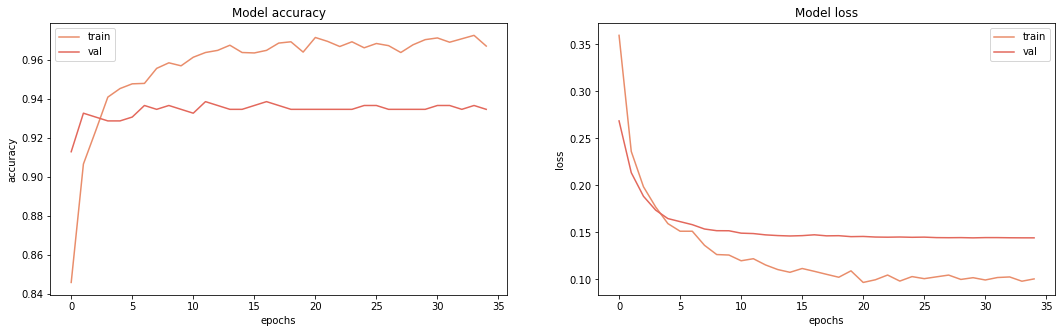

In [ ]:
# Learning Curve with accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(inceptionv3_history.history[element])
    axis[i].plot(inceptionv3_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 98.06%
_______________________________________________
CLASSIFICATION REPORT:
                Normal    Pneumonia  accuracy    macro avg  weighted avg
precision     0.978109     0.983201  0.980642     0.980655      0.980656
recall        0.983275     0.978012  0.980642     0.980643      0.980642
f1-score      0.980685     0.980600  0.980642     0.980642      0.980642
support    1136.000000  1137.000000  0.980642  2273.000000   2273.000000
_______________________________________________
Confusion Matrix: 
 [[1117   19]
 [  25 1112]]

Test Result:
Accuracy Score: 91.93%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.926045    0.912773  0.919304    0.919409      0.919409
recall       0.911392    0.927215  0.919304    0.919304      0.919304
f1-score     0.918660    0.919937  0.919304    0.919299      0.919299
support    316.000000  316.000000  0.919304 

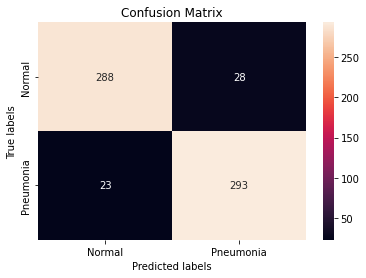

In [ ]:
# Print the score of Training and Testings sets

def print_score(inception_model, x_train, y_train_encode, x_test, y_test_encode, train=True):
    if train:
        pred = inception_model.predict(x_train)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = inception_model.predict(x_test)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])

print_score(inception_model, x_train, y_train_encode, x_test, y_test_encode, train=True)
print_score(inception_model, x_train,y_train_encode, x_test, y_test_encode, train=False)

In [ ]:
# Print the score of Validation set

pred = inception_model.predict(x_val)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 94.07%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.924242    0.958678  0.940711    0.941460      0.941392
recall       0.960630    0.920635  0.940711    0.940632      0.940711
f1-score     0.942085    0.939271  0.940711    0.940678      0.940684
support    127.000000  126.000000  0.940711  253.000000    253.000000
_______________________________________________
Confusion Matrix: 
 [[122   5]
 [ 10 116]]



### ROC Curve

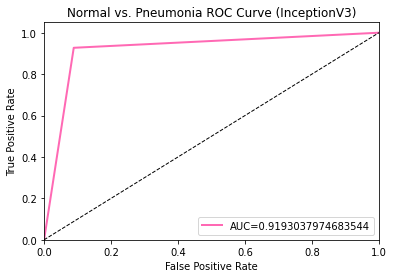

In [ ]:
from sklearn import metrics
y_pred = inception_model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Normal vs. Pneumonia ROC Curve (InceptionV3)')
plt.legend(loc="lower right")
plt.show()


### Classification Visualization

In [ ]:
predict_prob=inception_model.predict(x_test)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)
correct = np.nonzero(predict_classes == y_test_argmax)[0]
incorrect = np.nonzero(predict_classes != y_test_argmax)[0]


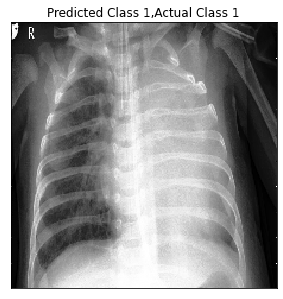

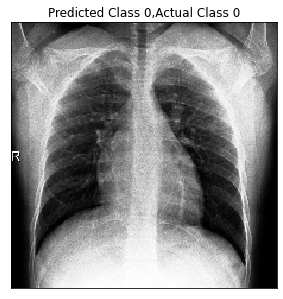

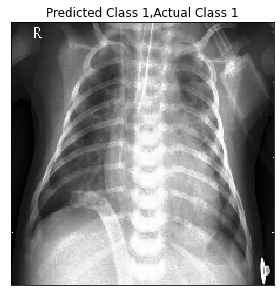

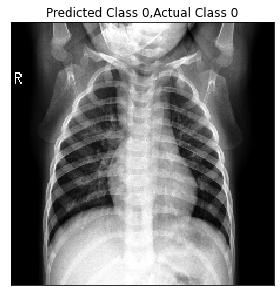

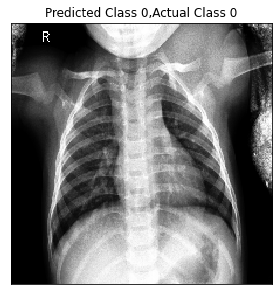

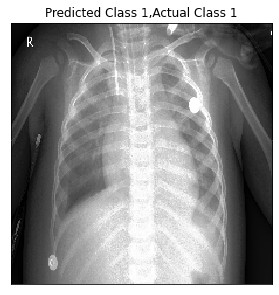

In [ ]:
# Correct classification

i = 0
for c in correct[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Normal
# class 1 = Pneumonia

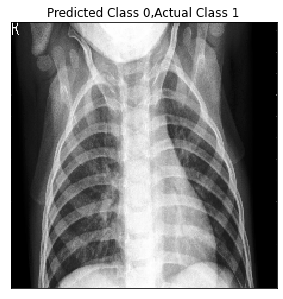

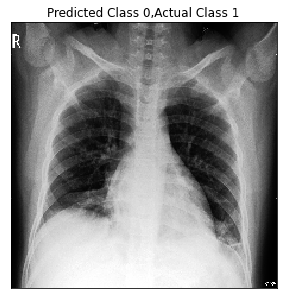

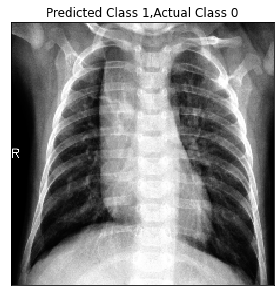

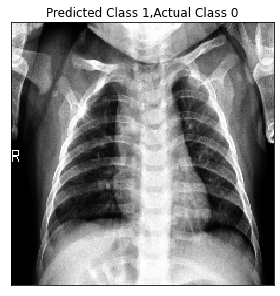

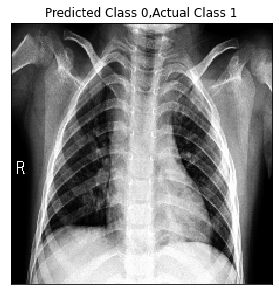

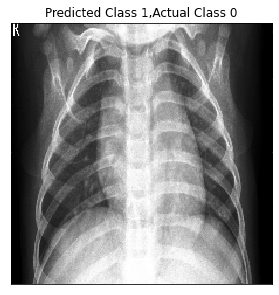

In [ ]:
# Incorrect classification

i = 0
for c in incorrect[:6]:
    plt.subplots(figsize = (12, 12))
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(img_size,img_size,nb_channels), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predict_classes[c], y_test_argmax[c]))
    plt.tight_layout()
    i += 1

# class 0 = Normal
# class 1 = Pneumonia

# Attention network

## VGG16

In [ ]:
# Implement VGG16 and add attention layers 

in_lay = Input(x_train.shape[1:])
base_pretrained_model = VGG16(input_shape =  x_train.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_features = base_pretrained_model(in_lay)
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = LocallyConnected2D(1, 
                                kernel_size = (1,1), 
                                padding = 'valid', 
                                activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w]) #linear
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.25)(Dense(1024, activation = 'elu')(gap_dr))
out_layer = Dense(nb_classes, activation = 'sigmoid')(dr_steps) 
attention_vgg16 = Model(inputs = [in_lay], outputs = [out_layer])

# Define parameters
attention_vgg16.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
attention_vgg16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 7, 7, 512)   2048        ['vgg16[1][0]']                  
 alization)                                                                                       
                                                                                              

In [ ]:
# Fit the model
attention_vgg16_history = attention_vgg16.fit(x_train, y_train_encode, 
                                  validation_data = (x_val, y_val_encode), 
                                  epochs = 100, 
                                  callbacks = callbacks)

Train on 2273 samples, validate on 253 samples
Epoch 1/100
2273/2273 [==============================] - ETA: 0s - loss: 0.4285 - accuracy: 0.8339
Epoch 1: val_loss improved from inf to 0.50227, saving model to best_model.h5
2273/2273 [==============================] - 37s 16ms/sample - loss: 0.4285 - accuracy: 0.8339 - val_loss: 0.5023 - val_accuracy: 0.8399 - lr: 1.0000e-04
Epoch 2/100
2272/2273 [============================>.] - ETA: 0s - loss: 0.2915 - accuracy: 0.8897
Epoch 2: val_loss improved from 0.50227 to 0.39785, saving model to best_model.h5
2273/2273 [==============================] - 11s 5ms/sample - loss: 0.2917 - accuracy: 0.8894 - val_loss: 0.3979 - val_accuracy: 0.8992 - lr: 1.0000e-04
Epoch 3/100
2272/2273 [============================>.] - ETA: 0s - loss: 0.2545 - accuracy: 0.9018
Epoch 3: val_loss improved from 0.39785 to 0.31299, saving model to best_model.h5
2273/2273 [==============================] - 11s 5ms/sample - loss: 0.2547 - accuracy: 0.9019 - val_loss: 0

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
attention_vgg16.save('/content/gdrive/MyDrive/DESU_DS/Projet_final/chest_xray/final_model_binary/attention_vgg16.h5') 

### Model performance

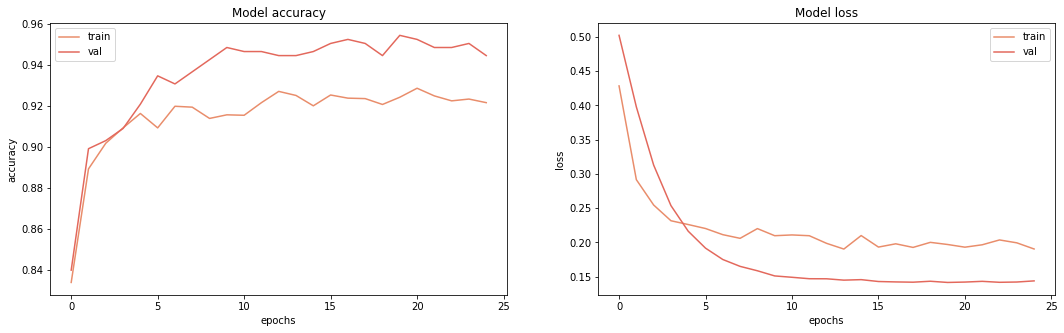

In [ ]:
# Learning curves from accuracy and loss

figure, axis = plt.subplots(1, 2, figsize=(18,5))
axis = axis.ravel()

for i,element in enumerate(['accuracy', 'loss']):
    axis[i].plot(attention_vgg16_history.history[element])
    axis[i].plot(attention_vgg16_history.history['val_' + element])
    axis[i].set_title('Model {}'.format(element))
    axis[i].set_xlabel('epochs')
    axis[i].set_ylabel(element)
    axis[i].legend(['train', 'val'])

Train Result:
Accuracy Score: 94.32%
_______________________________________________
CLASSIFICATION REPORT:
                Normal    Pneumonia  accuracy    macro avg  weighted avg
precision     0.938971     0.947602  0.943247     0.943287      0.943289
recall        0.948063     0.938434  0.943247     0.943249      0.943247
f1-score      0.943495     0.942996  0.943247     0.943246      0.943246
support    1136.000000  1137.000000  0.943247  2273.000000   2273.000000
_______________________________________________
Confusion Matrix: 
 [[1077   59]
 [  70 1067]]

Test Result:
Accuracy Score: 93.51%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.933754    0.936508  0.935127    0.935131      0.935131
recall       0.936709    0.933544  0.935127    0.935127      0.935127
f1-score     0.935229    0.935024  0.935127    0.935126      0.935126
support    316.000000  316.000000  0.935127 

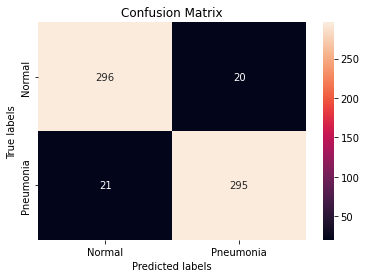

In [ ]:
# Print score of Training and Testing sets

def print_score(attention_vgg16, x_train, y_train_encode, x_test, y_test_encode, train=True):
    if train:
        pred = attention_vgg16.predict(x_train)
        pred = np.argmax(pred, axis=1)
        y_train_argmax = np.argmax(y_train_encode, axis=1)
        clf_report = pd.DataFrame(classification_report(y_train_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_argmax, pred)}\n")
        
    elif train==False:
        pred = attention_vgg16.predict(x_test)
        pred = np.argmax(pred, axis=1)
        y_test_argmax = np.argmax(y_test_encode, axis=1)
        cm = confusion_matrix(y_test_argmax, pred)
        clf_report = pd.DataFrame(classification_report(y_test_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test_argmax, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])

print_score(attention_vgg16, x_train, y_train_encode, x_test, y_test_encode, train=True)
print_score(attention_vgg16, x_train,y_train_encode, x_test, y_test_encode, train=False)

In [ ]:
# Print score of Validation set

pred = attention_vgg16.predict(x_val)
pred = np.argmax(pred, axis=1)
y_val_argmax = np.argmax(y_val_encode, axis=1)
clf_report = pd.DataFrame(classification_report(y_val_argmax, pred, output_dict=True, target_names = ['Normal', 'Pneumonia']))
print("Validation Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_val_argmax, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_val_argmax, pred)}\n")

Validation Result:
Accuracy Score: 94.47%
_______________________________________________
CLASSIFICATION REPORT:
               Normal   Pneumonia  accuracy   macro avg  weighted avg
precision    0.912409    0.982759  0.944664    0.947584      0.947445
recall       0.984252    0.904762  0.944664    0.944507      0.944664
f1-score     0.946970    0.942149  0.944664    0.944559      0.944569
support    127.000000  126.000000  0.944664  253.000000    253.000000
_______________________________________________
Confusion Matrix: 
 [[125   2]
 [ 12 114]]



### ROC Curve

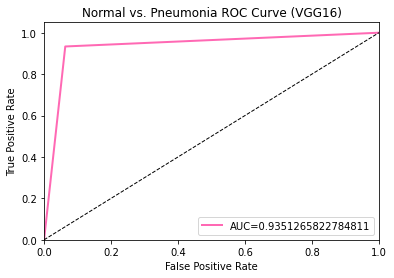

In [ ]:
from sklearn import metrics
y_pred = attention_vgg16.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test_argmax = np.argmax(y_test_encode, axis = 1)
fpr, tpr, _ = metrics.roc_curve(y_test_argmax,  y_pred)
auc = metrics.roc_auc_score(y_test_argmax, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc), lw = 2, color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Normal vs. Pneumonia ROC Curve (VGG16)')
plt.legend(loc="lower right")
plt.show()


### Heat map

In [ ]:
predict_prob=attention_vgg16.predict(x_test)
predict_classes=np.argmax(predict_prob,axis=1)
y_test_argmax=np.argmax(y_test_encode,axis=1)

# get the attention layer since it is the only one with a single output dim
for attn_layer in attention_vgg16.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)
            break

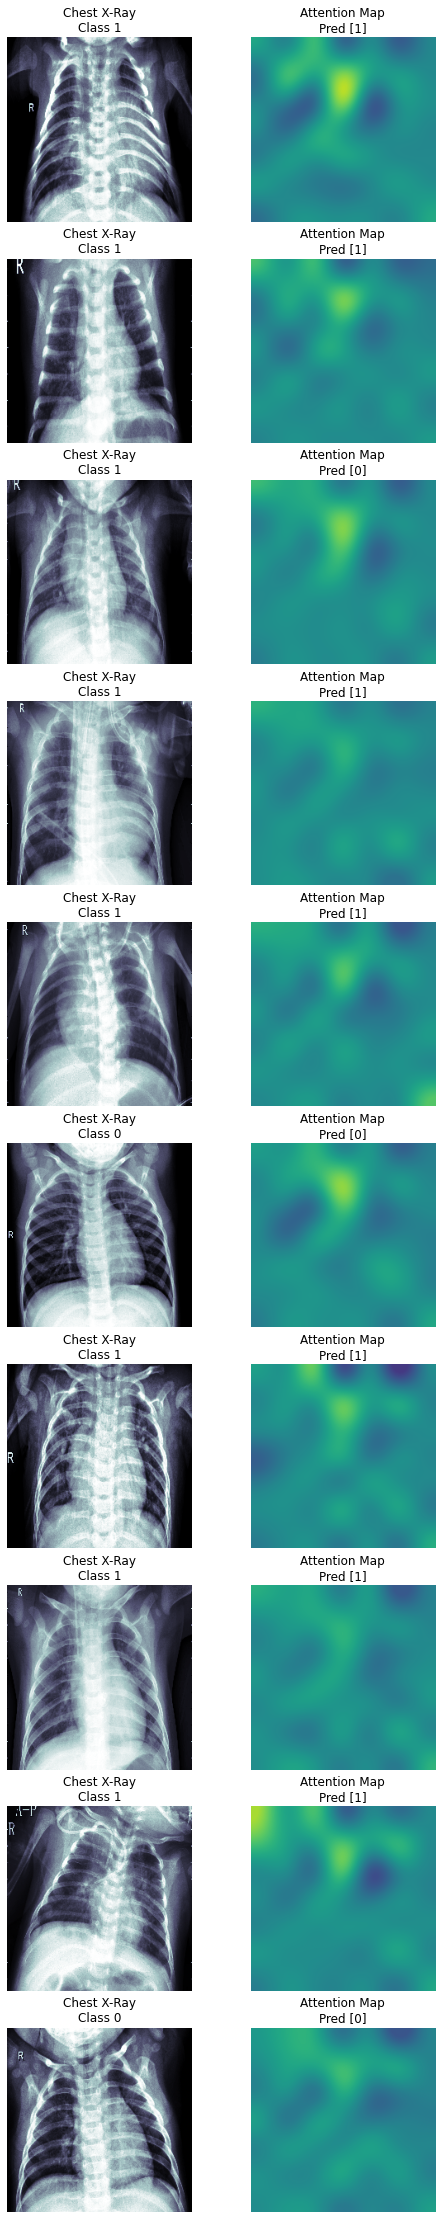

In [ ]:
# Visualize heat maps

import keras.backend as K
rand_idx = np.random.choice(range(len(x_test)), size = 10)
attn_func = K.function(inputs = [base_pretrained_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]

for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
    cur_img = x_test[c_idx:(c_idx+1)]
    attn_img = attn_func([cur_img, 0])[0]
    img_ax.imshow(cur_img[0,:,:,0], cmap = 'bone')
    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    real_class = y_test_argmax[c_idx]
    img_ax.set_title('Chest X-Ray\nClass {}' .format(real_class))
    pred_class = np.argmax(attention_vgg16.predict(cur_img),axis=1)
    attn_ax.set_title('Attention Map\nPred {}' .format(pred_class))
fig.savefig('attention_map.png', dpi = 300)

# 0 = Normal
# 1 = Pneumonia